In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [27]:
# With the provided airbnb information, try to study how to invest and manage rental properties in New York City.
# To find out the most popular locations, price range and room types are very important to keep the listing properties busy.


In [25]:
data = pd.read_csv('AB_NYC_2019.csv')
print(data.info())
print(data.isnull().sum())
data.head()

# exploring data: checking the column name and columns with null values
# showing the first several rows of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Text(0.5, 1.0, 'Locations of Airbnb listing in New York City')

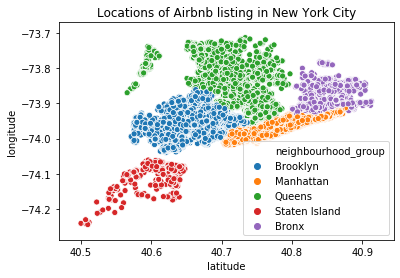

In [28]:
sns.scatterplot(x='latitude', y='longitude', data=data, hue='neighbourhood_group')
plt.title('Locations of Airbnb listing in New York City')

# showing all the airbnb listing locations in the New York City
# different color represent different neighbourhood

  neighbourhood_group  total number of listing per group
0               Bronx                               1091
1            Brooklyn                              20104
2           Manhattan                              21661
3              Queens                               5666
4       Staten Island                                373


([<matplotlib.patches.Wedge at 0x1e9deafe278>,
 [Text(-1.0047721984719782, -0.4476972516978277, 'Bronx'),
  Text(0.22950550501598346, -1.075791440367211, 'Brooklyn'),
  Text(0.26993744624194793, 1.066364747690196, 'Manhattan'),
  Text(-1.097823531878655, 0.0691627996359042, 'Queens'),
  Text(-1.04238068882735, -0.35134384804606966, 'Staten Island')],
 [Text(-0.5480575628028971, -0.2441985009260878, '2.2%'),
  Text(0.12518482091780916, -0.5867953311093878, '41.1%'),
  Text(0.1472386070410625, 0.5816534987401069, '44.3%'),
  Text(-0.5988128355701753, 0.03772516343776592, '11.6%'),
  Text(-0.5685712848149181, -0.1916420989342198, '0.8%')])

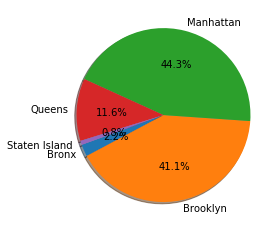

In [39]:
df1 = data['id'].groupby(data['neighbourhood_group']).count()
df1 = df1.to_frame().reset_index()
df1 = df1.rename(columns = {'id':'total number of listing per group'})
print(df1)

plt.pie( df1['total number of listing per group'], labels=df1['neighbourhood_group'],shadow=True, startangle=200,autopct='%1.1f%%')

# a pie plot showing which neighbourhood has the most and least airbnb listing in New York City

Text(0.5, 1.0, 'The most competitive neighbours in New York City')

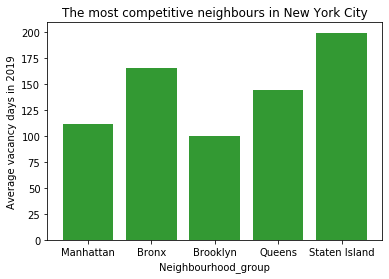

In [30]:
a = data[data['neighbourhood_group']=='Manhattan']['availability_365'].sum()/len(data[data['neighbourhood_group']=='Manhattan'])
b = data[data['neighbourhood_group']=='Bronx']['availability_365'].sum()/len(data[data['neighbourhood_group']=='Bronx'])
c = data[data['neighbourhood_group']=='Brooklyn']['availability_365'].sum()/len(data[data['neighbourhood_group']=='Brooklyn'])
d = data[data['neighbourhood_group']=='Queens']['availability_365'].sum()/len(data[data['neighbourhood_group']=='Queens'])
e = data[data['neighbourhood_group']=='Staten Island']['availability_365'].sum()/len(data[data['neighbourhood_group']=='Staten Island'])
# print(a,b,c,d,e)
days = {'Neibourhood_group': ['Manhattan','Bronx','Brooklyn','Queens','Staten Island'],'Number of days available': [a,b,c,d,e]}
df2 = DataFrame(days, columns=('Neibourhood_group', 'Number of days available'))
plt.bar(df2['Neibourhood_group'], df2['Number of days available'], align='center', color='g', alpha=0.8)
plt.ylabel('Average vacancy days in 2019')
plt.xlabel('Neighbourhood_group')
plt.title('The most competitive neighbours in New York City')

# the most competitive neighbourhood is Staten Island, since the average listing vacancy is the longest.
# Manhattan and Brooklyn should be idea location for new airbnb properties investors, because there are less availables in these two neighbourhood


-0.23834736964558512

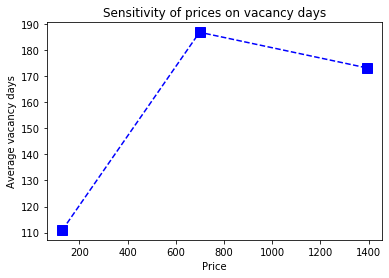

In [88]:
a = data[(data['price']<500)]['availability_365'].mean()
b = data[(data['price']>500)&(data['price']<1000)]['availability_365'].mean()
c = data[(data['price']>1000)&(data['price']<2000)]['availability_365'].mean()

a1 = data[data['price']<500]['price'].mean()
b1 = data[(data['price']<1000)&(data['price']>500)]['price'].mean()
c1 = data[(data['price']<2000)&(data['price']>1000)]['price'].mean()

average_availability = [a,b,c]
average_price = [a1,b1, c1]
plt.plot(average_price,average_availability, 'b.--', markersize=10, marker='s')

plt.xlabel('Price')
plt.ylabel('Average vacancy days')
plt.title('Sensitivity of prices on vacancy days')

# Price is another very important factor for attracting potential customers 
# From the plot, it seems price after a centain range will increase the listing vacancy dramatically. So the relative low range prcie will
# be suggested for reducing the longer vacancy risk

r2_score(data['price'], data['availability_365'])

In [32]:
data.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,25409,25402,25409,25400,25409,25409,25409,25409,25409,25409,25409,20332,20332,25409,25409
Private room,22326,22318,22326,22314,22326,22326,22326,22326,22326,22326,22326,17665,17665,22326,22326
Shared room,1160,1159,1160,1160,1160,1160,1160,1160,1160,1160,1160,846,846,1160,1160


Text(0.5, 1.0, 'Most needed room type in New York City')

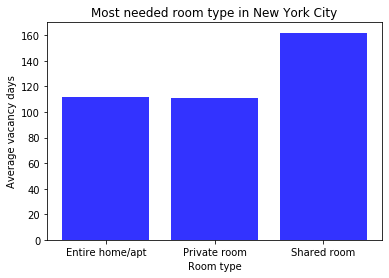

In [33]:
a = data[data['room_type']=='Entire home/apt']['availability_365'].mean()
b = data[data['room_type']=='Private room']['availability_365'].mean()
c = data[data['room_type']=='Shared room']['availability_365'].mean()
x = ['Entire home/apt','Private room','Shared room']
y = [a,b,c]
plt.bar(x, y, align='center', color='b', alpha=0.8)
plt.xlabel('Room type')
plt.ylabel('Average vacancy days')
plt.title('Most needed room type in New York City')

# Entire home or private room listing are more needed than shared room in New York City

In [34]:
a=data['number_of_reviews']
b=data['availability_365']
c=data[data['calculated_host_listings_count']==5]['availability_365'].mean()
d=data[data['calculated_host_listings_count']==6]['availability_365'].mean()
print(c,d)



202.57278106508875 221.57894736842104


Text(0.5, 1.0, 'The top 20 popular words for listing names')

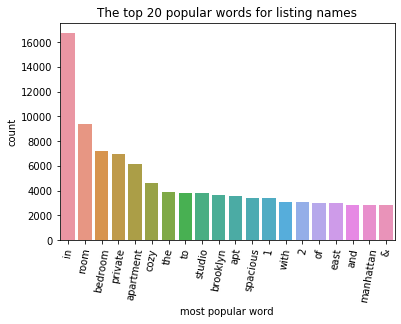

In [85]:
from collections import Counter
names=[]
words=[]
for name in data['name']:
    a = str(name).split()
    names.append(a)
    
for name in names:
    for word in name:
        word=word.lower()
        words.append(word)
top_20 = Counter(words).most_common()
top_20 = top_20[0:20]

df3 = pd.DataFrame(top_20)
df3 = df3.rename(columns ={0:'most popular word', 1:'count'})
viz = sns.barplot(df3['most popular word'], df3['count'])
viz.set_xticklabels(viz.get_xticklabels(),rotation=80)
viz.set_title('The top 20 popular words for listing names')


# the top 20 key words shown in the plot
# Words like 'private', 'cozy' and 'spacious' seems most popular words for decribing listing properties

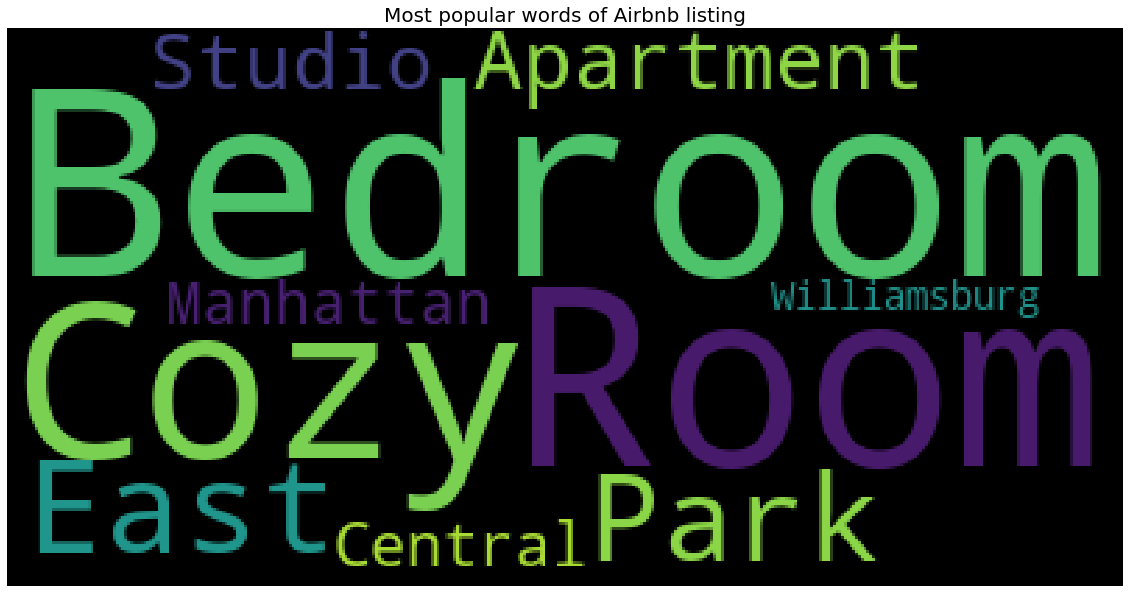

In [87]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 10,
                      max_font_size = 120,
                      random_state = 4
                    ).generate(str(data['name']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("Most popular words of Airbnb listing", fontsize = 20)
plt.axis('off')
plt.show()

# missing some words ?

([<matplotlib.patches.Wedge at 0x1e9de1c6710>,
 [Text(-1.0047721984719782, -0.4476972516978277, 'Bronx'),
  Text(0.22950550501598346, -1.075791440367211, 'Brooklyn'),
  Text(0.26993744624194793, 1.066364747690196, 'Manhattan'),
  Text(-1.097823531878655, 0.0691627996359042, 'Queens'),
  Text(-1.04238068882735, -0.35134384804606966, 'Staten Island')],
 [Text(-0.5480575628028971, -0.2441985009260878, '2.2%'),
  Text(0.12518482091780916, -0.5867953311093878, '41.1%'),
  Text(0.1472386070410625, 0.5816534987401069, '44.3%'),
  Text(-0.5988128355701753, 0.03772516343776592, '11.6%'),
  Text(-0.5685712848149181, -0.1916420989342198, '0.8%')])

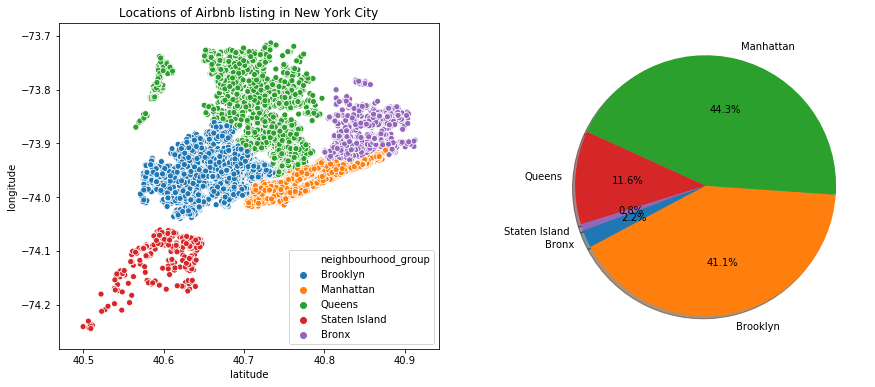

In [36]:
plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='latitude', y='longitude', data= data, hue='neighbourhood_group')
plt.title('Locations of Airbnb listing in New York City')

plt.subplot(1,2,2)
plt.pie( df1['total number of listing per group'], labels=df1['neighbourhood_group'],shadow=True, startangle=200,autopct='%1.1f%%')

Text(0.5, 1.0, 'The top 20 popular words for listing names')

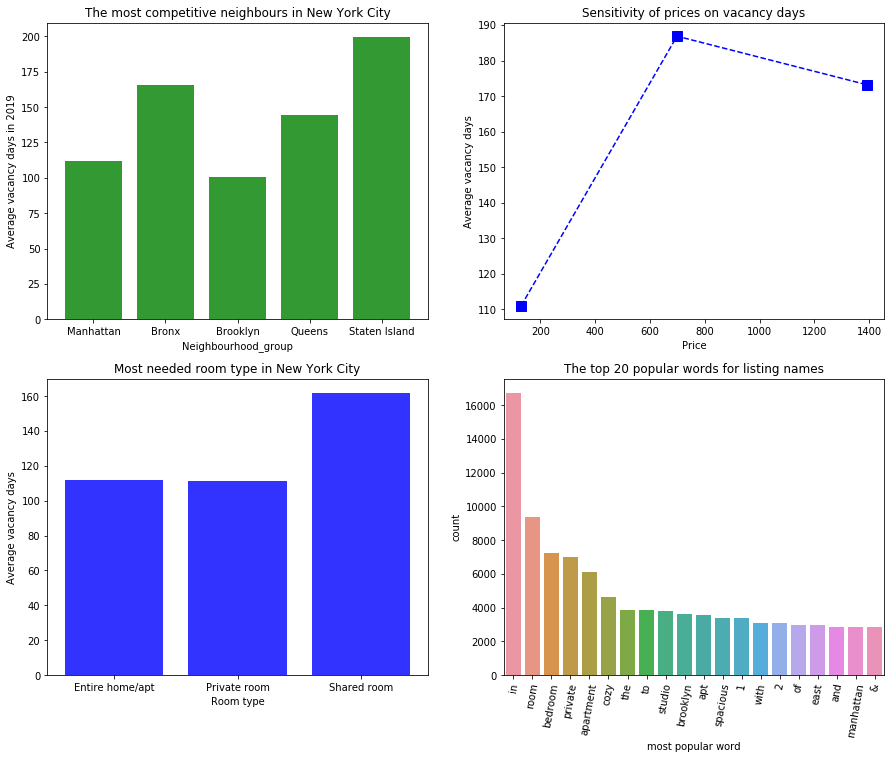

In [37]:

plt.subplots(figsize=(15,12))

plt.subplot(2,2,1)
plt.bar(df2['Neibourhood_group'], df2['Number of days available'], align='center', color='g', alpha=0.8)
plt.ylabel('Average vacancy days in 2019')
plt.xlabel('Neighbourhood_group')
plt.title('The most competitive neighbours in New York City')

plt.subplot(2,2,2)
plt.plot(average_price,average_availability, 'b.--', markersize=10, marker='s')
plt.xlabel('Price')
plt.ylabel('Average vacancy days')
plt.title('Sensitivity of prices on vacancy days')

plt.subplot(2,2,3)
plt.bar(x, y, align='center', color='b', alpha=0.8)
plt.xlabel('Room type')
plt.ylabel('Average vacancy days')
plt.title('Most needed room type in New York City')

plt.subplot(2,2,4)
viz = sns.barplot(df3['most popular word'], df3['count'])
viz.set_xticklabels(viz.get_xticklabels(),rotation=80)
viz.set_title('The top 20 popular words for listing names')
